<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In this tutorial we will see how to use logistic regression for multiclass classification.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

sklearn dataset has predefined readymade dataset that you can use to learn for machine learning. I a using load_digits dataset. you can read the documentaion has 1797 handwriiten digits of size 8*8. Using these digit , we are going to identifies that what digit that is.

Call load digit method  to load my training set

In [2]:
digits = load_digits()

i will explore what training st contains. it contains many things('DESCR', 'data', 'images', 'target', 'target_names'). it has real data.

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# there are 1797 digits. i m going to print first one
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

It is 8*8 image and image are represneted in 1-D array. if you count these element, it will be 64.

if you want see particular element. you can use matplotlib.
plt has method called matshow(). you can print the corrosponding image.
'data' have numeric data & 'image' has actual image.

<Figure size 432x288 with 0 Axes>

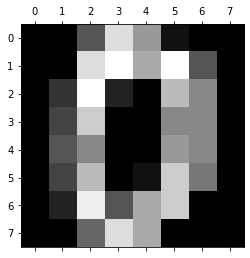

In [5]:
plt.gray()
plt.matshow(digits.images[0])

you can see that data[0] & image[0], they can realate each other the only difference between two is that you have numeric data vs actual image.

if print five sample. you will get the first five images.

In [6]:
#plt.gray()
#for i in range(5):
#   plt.matshow(digits.images[i])

you will get 5 images with corrosponding data array. with the help of data array we will tarin our model.

now print our target.

In [7]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

you see 0 to 5 in sequence. it is say that first image is 0 & thae last image is 4. so we use "data" & "target" to train our model. Before training our model. we are trying to devide the data into training & test sample. 

In [8]:
# we import train_test_split for split the data datset and target varribale
from sklearn.model_selection import train_test_split

In [9]:
# we have devide in train and test set.
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

###### Why we want train set & test set?
the reason to do this is, we don't to do overfit our model. We don't want to make our model, such that it baised against training data. thats way the data that model train against should be different than the data that model is tested again. thats wy we split these two. training  & test data both are diffent but part of the data set.
input varribale--> data.......
output varriable---> target......
if you look at,i splitted 80% sample for training and 20% for testing.

In [10]:
#X_train,X_test,y_train,y_test​ we use len() method
len(X_train)             # SAME METHOD ALSO WE CAN APPLY FOR OTHER TOO

1437

###### Creating the Logistic Regression model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# Create a model object
model = LogisticRegression()

The way for tarining we call fit(Method)................
X_train = have handwrriten character............
y_train = have corrosponding output


In [13]:
model.fit(X_train,y_train) # when it will run , our model become trained

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

When our model become ready. I will always to do, we calulate the 'score'..................
Score tells us how's accurate our model 

In [14]:
# X_test--> it will calculate the y predicted value and then y predicted value compare with real value that is y_test
model.score(X_test,y_test)

0.9666666666666667

my model looking very good. Our accuracy is 96%( really good).

Now i am going to make actual prediction. you have to call predict(method) for  that. Before call this method. I will pickup a random sample.

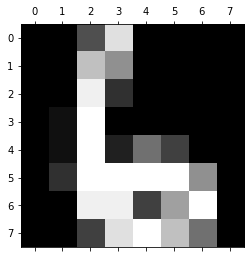

In [15]:
#PIKUP the random sample
plt.matshow(digits.images[67])

In [16]:
#  This number is actualy 
# You hav to access same index in your target, this is 6. 
digits.target[67]

6

lets see what our model predict for 67. 

I am not going to supply images here. becauses images are binary data. My model likes numeric data mode. so i uses data instead of images. we have to supply multydimensional array.
now we are going to predict.

In [17]:
model.predict([digits.data[67]]) # we can see the targettting varriable.

array([6])

In [18]:
# Now we want to predict 0 to 5
model.predict(digits.data[0:5]) # result is looking vrery good.

array([0, 1, 2, 3, 4])

Now we get our model fails or our model falling accuracy.The way to know , this is confusion matrix. For confusion matrix.

In [19]:
# i will show you what confusion matrix is really. for that i have to import.
y_predicted = model.predict(X_test) # I will get all athe predicted values for this X_test
from sklearn.metrics import confusion_matrix  # creat a confusion matrix


 In the confusion matrix we supply y_test which is the truth and y-predicted(which is what your model predicted) And then we get the confusion matrix. When we run we get 2-D array.

In [20]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  1,  1],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 50]], dtype=int64)

For visulization of confusion matrics we use seaborn libray (For data visulazataion). Seaborn librerries similar to matplotlib.

Text(24.0, 0.5, 'Truth')

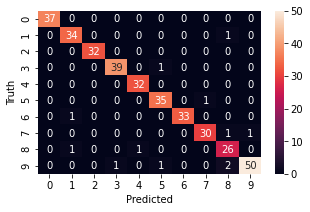

In [21]:
# Confusion-Matix visulizataion.
import seaborn as sn
plt.figure(figsize= (5,3))
sn.heatmap(cm,annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# How is work

Here you see 28 number whats it means is , 28 times the truth was zero and my model predicted it to be zero.

Here the 2 means, 2 times our truth was 8 but our model says it is 1. so these ara the instances where our model is not doing good.

here 1 times my image of digit 4 bu my model predicted it to be 1.
confusion matrix is nice visulaization of how our model was doing